In [1]:
import json
import numpy as np

In [2]:
file = 'example.txt'

In [3]:
records = [json.loads(line) for line in open(file)]

Here is one of the example of the file

In [4]:
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

Now we would like to see what are the top time zones from the dataset

In [5]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]
time_zones[0:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

Here we find out there are some void values in the time zones section. So, we would like to know the stats behind these time zones with __Panda__ package

In [6]:
import pandas as pd

In [7]:
df = pd.DataFrame(records)

In [8]:
tz_counts = df['tz'].value_counts()
tz_counts[0:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

Since there exists empty strings of the time zones. So, we would like to do some data cleaning and treat the empty string as __missing value__ and the corresponding time zone as __unknown__

In [9]:
df_clean = df['tz'].fillna('Missing')
df_clean[df_clean == ''] = 'unknown'
df_clean_counts = df_clean.value_counts()
df_clean_counts[0:10]

America/New_York       1251
unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

After we cleaned the data a little bit by substituting the missing values, we would like to explore the visulazation by using __seaborn__ package

In [10]:
import seaborn as sns


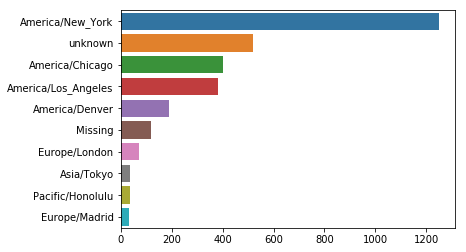

In [11]:
subset = df_clean_counts[0:10]
sns.barplot(y=subset.index, x = subset.values)


From the original dataset, there is a field contains information about the browser, device, or application used to perform the URL shortening. The followings are the codes about it.


In [12]:

browser= [rec['a'] for rec in records if 'a' in rec]

browser[0:10]

['Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'GoogleMaps/RochesterNY',
 'Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 6.1; WOW64; Trident/4.0; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; Media Center PC 6.0; .NET4.0C; .NET4.0E; InfoPath.3)',
 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8) AppleWebKit/534.52.7 (KHTML, like Gecko) Version/5.1.2 Safari/534.52.7',
 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.79 Safari/535.11',
 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.79 Safari/535.11',
 'Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.79 Safari/535.11',
 'Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/20100101 Firefox/4.0.1',
 'Opera/9.80 (X11; Linux zbov; U; en) Presto/2.10.254 Version/12.00',
 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gec

We would like to investigate the stats of the browsers usage from the users. The top 5 browser usage and the visulazation can be done as followings:

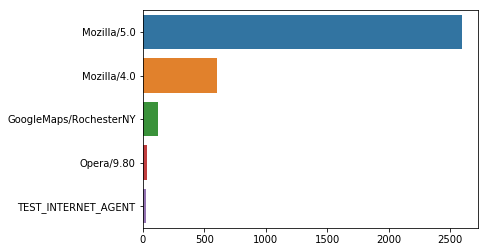

In [13]:
results = pd.DataFrame([x.split()[0] for x in browser])
results_count = results[0].value_counts()
top_results=results_count[0:5]
sns.barplot(y = top_results.index, x = top_results.values)

Now, we would like to decompose the top time zones into Windows and non-Windows users. To simplify the investigation, we assume if the string __'Windows'__ is in the agent string. Also, we exclude the missing value from the data 

In [14]:
# Exclude the null value
clean_df = df[df.a.notnull()]

# Split Windows and non-Windows
clean_df['os'] = np.where(clean_df['a'].str.contains('Windows'), 'Windows','Not Windows')
clean_df['os'][0:5]

C:\Users\zhuji\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
Name: os, dtype: object

The results can be shown by using __groupby__ method and reshape by using __unstack__ function. The following shows the first five lines of the result.

In [15]:
group_tz_os = clean_df.groupby(['tz','os'])
group_tz_os.size().unstack().fillna(0)[0:5]

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0


Then, we would like to explore the top overall time zones. To do so, we construct and indirect index array from the row counts from the __groupby__ method. Also, we used the __sort__ method in ascending order to present the first eight lines

In [16]:
agg_counts = group_tz_os.size().unstack().fillna(0)

indexer = agg_counts.sum(1).argsort()

indexer[0:8]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
dtype: int64

Besides the above methods to explore, we would like to see the last 10 rows (largest values) of the counts

In [17]:
subset_counts = agg_counts.take(indexer[-10:])
subset_counts

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


To visulize the results, as shown in the preceding code block, this can be done in a bar plot by using __seaborn__ package. The code can be shown as followings:

In [18]:
subset_counts = subset_counts.stack()
subset_counts.name = 'total'
subset_counts = subset_counts.reset_index()
subset_counts[0:8]

,tz,os,total
0,America/Sao_Paulo,Not Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Not Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Not Windows,0.0
5,Pacific/Honolulu,Windows,36.0
6,Asia/Tokyo,Not Windows,2.0
7,Asia/Tokyo,Windows,35.0


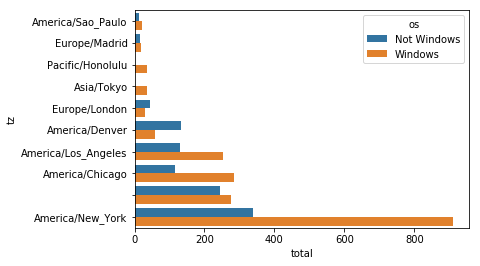

In [19]:
sns.barplot(x = 'total', y = 'tz', hue='os', data = subset_counts)

From the plot shown above, it is easy to see that most of the time zone have more Windows user than Non-Windows users. Especially, the New York time zone has the most Windwos users. Only at Denver time zone, the non-Windows users exceed the Windows users. 